In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load cleaned dataset
df = pd.read_csv("../data/processed_sales.csv")

# Parse date column again for plotting
df["date"] = pd.to_datetime(df["date"])

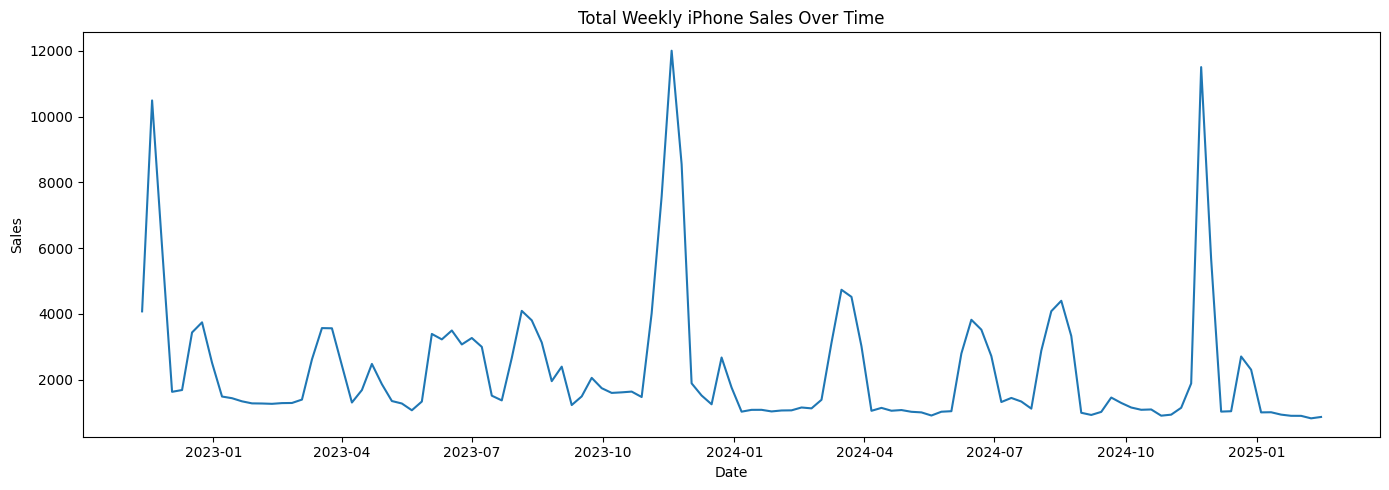

In [3]:
# Total weekly sales across all models
weekly_total = df.groupby("date")["sales"].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_total, x="date", y="sales")
plt.title("Total Weekly iPhone Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

This chart shows the total number of iPhone sales per week across all models from November 2022 to early 2025.

#### Key Observations
- There are clear seasonal spikes in sales approximately once per year, with peaks around:
  - November 2022
  - October–November 2023
  - October–November 2024
- These peaks likely align with major retail events such as Black Friday or the holiday shopping season.
- Outside of these peaks, sales remain stable but significantly lower, with smaller fluctuations that may reflect minor promotions or product-specific events.

#### Business Implications
- This confirms a strong seasonal trend that should be taken into account when forecasting future sales.
- It suggests that inventory planning and promotional campaigns should be aligned with these yearly sales cycles.
- Forecasting models should include features like week number, month, and promotion flags to capture these effects.

C:\Users\dbira\AppData\Local\Temp\ipykernel_36640\3733913657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_total_sales.values, y=model_total_sales.index, palette="viridis")


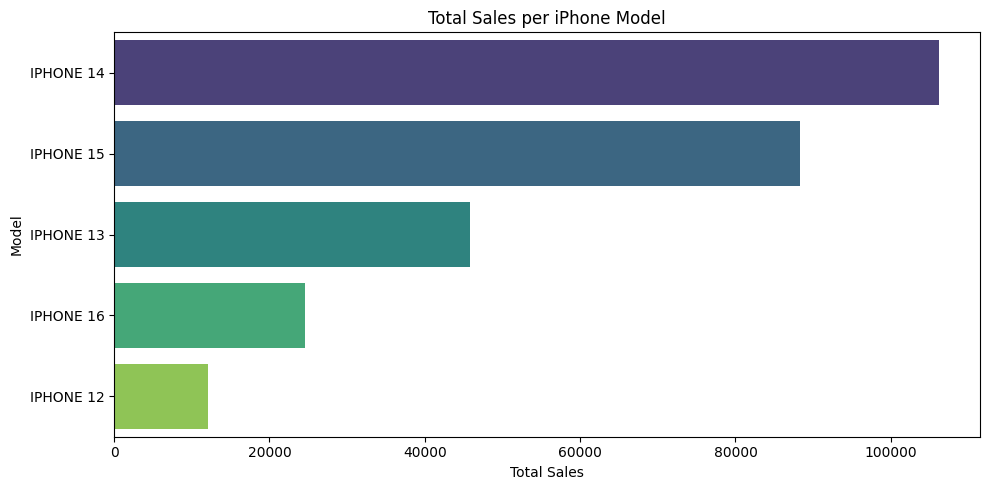

In [5]:
model_total_sales = df.groupby("model")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=model_total_sales.values, y=model_total_sales.index, palette="viridis")
plt.title("Total Sales per iPhone Model")
plt.xlabel("Total Sales")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

This bar chart shows the total number of units sold per iPhone model over the full observed period.

#### Key Observations
- The iPhone 14 is the top-selling model by a significant margin, followed by the iPhone 15.
- The iPhone 13 also achieved substantial sales but noticeably less than the iPhone 14 and 15.
- iPhone 16 and iPhone 12 have lower total sales, which may be due to:
  - Shorter time on the market (e.g., recent launch for iPhone 16)
  - End-of-life status or discontinuation (e.g., older iPhone 12)

#### Business Implications
- Sales volume is not evenly distributed across models; newer models likely cannibalize older ones.
- Forecasting should account for each product's lifecycle and time since launch.
- This insight can guide model-specific inventory and marketing strategies.

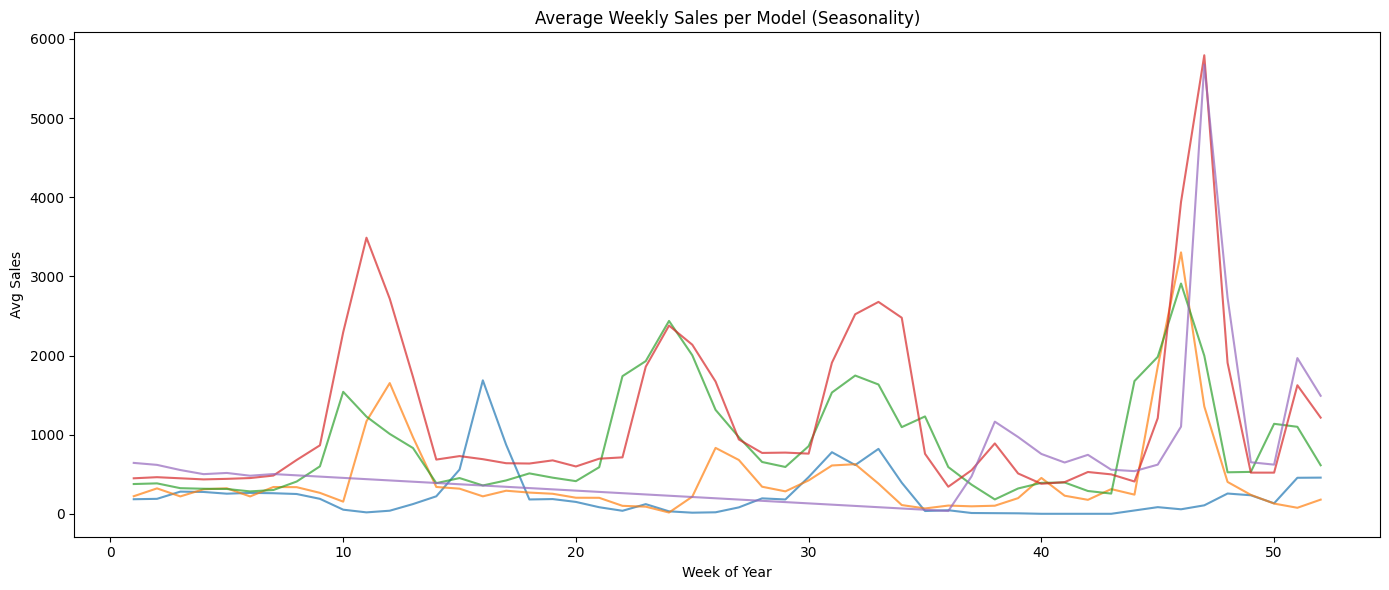

In [6]:
weekly_model_avg = df.groupby(["model", "week_of_year"])["sales"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_model_avg, x="week_of_year", y="sales", hue="model", legend=False, alpha=0.7)
plt.title("Average Weekly Sales per Model (Seasonality)")
plt.xlabel("Week of Year")
plt.ylabel("Avg Sales")
plt.tight_layout()
plt.show()

This chart shows the average weekly sales per iPhone model aggregated by week of year (1 to 52), helping identify seasonal sales patterns across products.

#### Key Observations
- All models show a **sharp increase in sales between weeks 44 and 48**, which aligns with the **holiday season and Black Friday** period.
- Some models (especially newer ones) show **additional peaks earlier in the year**, possibly tied to product launches or spring promotions.
- Outside of these high-demand windows, average weekly sales tend to remain low and stable, with minor fluctuations.
- Models generally follow similar seasonal curves, though the **magnitude of the peaks varies** by model, reflecting different lifecycle stages or marketing efforts.

#### Business Implications
- Seasonality is a strong and consistent factor in sales behavior and should be captured using week-of-year or calendar-based features in modeling.
- Models should be trained to account for **recurring holiday effects**, especially around Q4.
- Understanding which models are most sensitive to seasonality can inform **targeted marketing or pricing strategies** during peak periods.

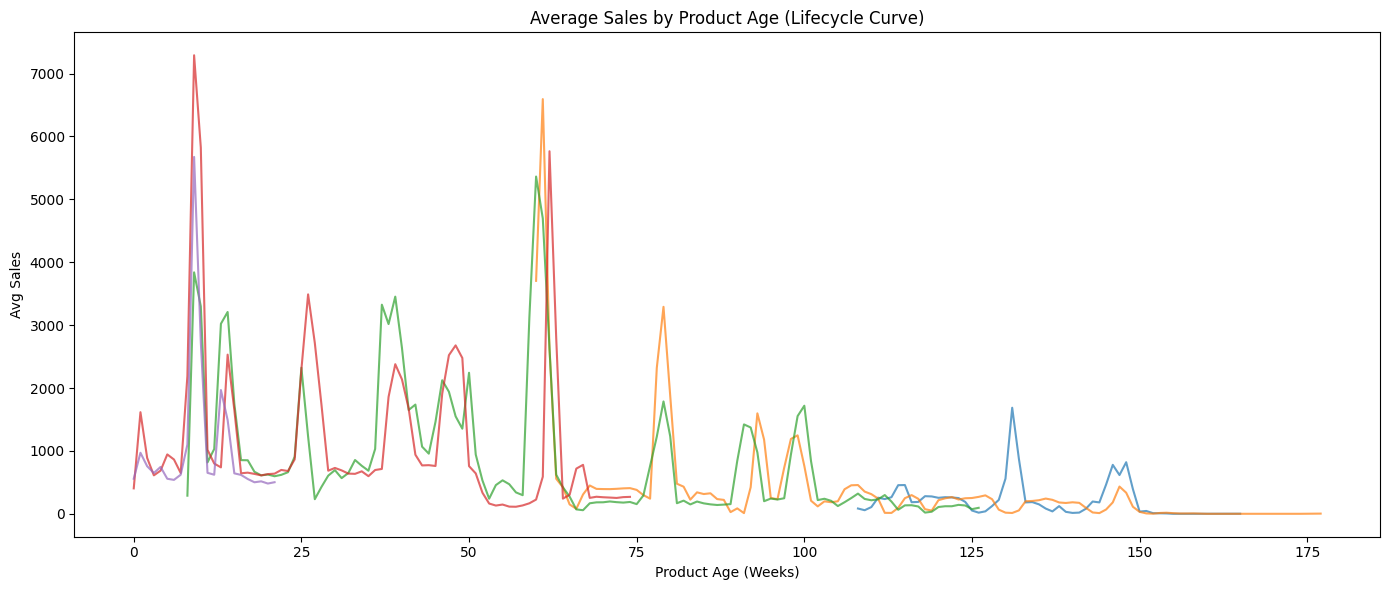

In [7]:
# Average sales by product age
lifecycle = df.groupby(["model", "product_age_weeks"])["sales"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=lifecycle, x="product_age_weeks", y="sales", hue="model", legend=False, alpha=0.7)
plt.title("Average Sales by Product Age (Lifecycle Curve)")
plt.xlabel("Product Age (Weeks)")
plt.ylabel("Avg Sales")
plt.tight_layout()
plt.show()

This chart shows the average weekly sales of each iPhone model relative to the number of weeks since its launch, providing a view of the product lifecycle over time.

#### Key Observations
- Most models show a **strong sales peak within the first 5–10 weeks** after launch, indicating successful initial demand, possibly driven by marketing campaigns or pre-orders.
- After this launch window, sales typically **decline sharply**, followed by a few smaller surges that may correspond to seasonal events like Black Friday or promotions.
- Some models maintain **intermittent sales activity** for over a year, but with progressively lower amplitude.
- A few spikes later in the lifecycle suggest that **promotions or restocks** can briefly boost interest in older models.

#### Business Implications
- The data clearly reflects a **classical product lifecycle curve**: launch peak → decay → flat tail.
- Forecasting models should incorporate the **product age** feature to adjust expectations over time.
- This insight can help with **inventory planning**, especially in the post-launch phase where sales taper off.

C:\Users\dbira\AppData\Local\Temp\ipykernel_36640\707662369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_effect, x="is_promo", y="sales", palette="pastel")


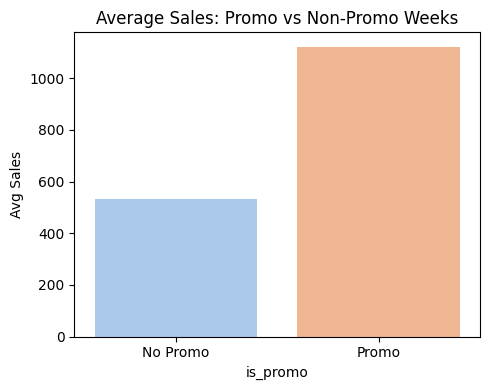

In [8]:
promo_effect = df.groupby("is_promo")["sales"].mean().reset_index()

plt.figure(figsize=(5, 4))
sns.barplot(data=promo_effect, x="is_promo", y="sales", palette="pastel")
plt.title("Average Sales: Promo vs Non-Promo Weeks")
plt.xticks([0, 1], ["No Promo", "Promo"])
plt.ylabel("Avg Sales")
plt.tight_layout()
plt.show()

This bar chart compares the average number of weekly sales between promotional and non-promotional weeks across all iPhone models.

#### Key Observations
- Weeks with promotions have significantly higher average sales — more than **double** compared to non-promo weeks.
- This indicates that promotional activity has a **strong and consistent impact on demand**.
- The difference suggests that customers are highly responsive to discounts or marketing campaigns.

#### Business Implications
- Promotional periods drive substantial uplift in sales and should be **anticipated and modeled explicitly**.
- The presence of a promotion flag (`is_promo`) will likely be an important predictor in machine learning models.
- Forecasting teams should collaborate closely with marketing to incorporate **planned promotions into sales predictions**.

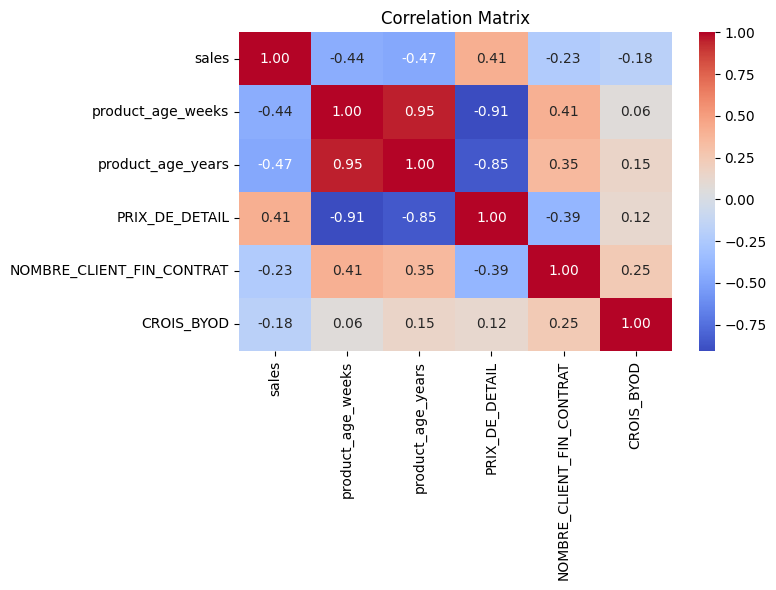

In [9]:
features_to_corr = df[[
    "sales", "product_age_weeks", "product_age_years", "PRIX_DE_DETAIL", 
    "NOMBRE_CLIENT_FIN_CONTRAT", "CROIS_BYOD"
]]

corr = features_to_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

This heatmap shows pairwise Pearson correlation coefficients between numerical features in the dataset, including the target variable `sales`.

#### Key Observations
- `sales` is **negatively correlated** with both `product_age_weeks` (-0.44) and `product_age_years` (-0.47), indicating that sales tend to decline as products age — a common lifecycle effect.
- `sales` is **positively correlated** with `PRIX_DE_DETAIL` (0.41), which could suggest that higher-priced models sell more, or that newer (expensive) models drive demand early in their lifecycle.
- `product_age_weeks` and `PRIX_DE_DETAIL` are **strongly negatively correlated** (-0.91), reinforcing that price typically drops as the product gets older.
- Correlations with `NOMBRE_CLIENT_FIN_CONTRAT` and `CROIS_BYOD` are weak to moderate, but still worth including as potential demand-side signals.

#### Business Implications
- Product age is a strong inverse signal for sales and should be used in forecasting models.
- Pricing, launch timing, and model freshness are deeply intertwined — these dynamics must be considered together when forecasting or planning inventory.
- Despite moderate correlation, customer behavior indicators like contract endings or BYOD growth may help **capture regional or behavioral trends** and should be tested as features.